<a id='top'></a>
# Group Project
## Table of Contents

[Initial Imports](#initial)

[Correlation Matrix](#correlation)

[Correlation Heatmap](#heatmap)
    
[Data Spreads](#spreads)

[Averages](#averages)

### Results Section
[Regression Results](#results)

[Results: Women and Board Sizes](#board_size)

[Results: Gender Parity and Diversity Quotas](#gender_parity)

[Results: Quota Countries and Quota Percentage](#quota_pcnt)

[Diversity Information By Country](#countries)

[Quota Countries with datapoint counts](#quota_countries)

[Table: Board diversity by country and year](#countries_tbl)

[Table: Board diversity by country and year for quota countries](#quota_country_div)

[Graphs for countries with quotas for publicly traded firms](#quota_graphs)

[Graph: Norway](#norway)

[Graph: Spain](#spain)

[Graph: France](#france)

[Graph: Israel](#israel)

[Graph: Belgium](#belgium)

<a id="initial"></a>
### `Initial imports and parameter setting`
[Return to Table of Contents](#top)

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels
from IPython.display import Image, display
from IPython.core.display import HTML 
import seaborn as sns

%matplotlib inline

print('Python version: ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
#print('Scikit-Learn version: ' + sklearn.__version__)
print('Interpreter path: ' + sys.executable)
print('Statsmodel version: ' + statsmodels.__version__)
print('Seaborn version: ' + sns.__version__)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)


Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.0
Matplotlib version: 2.2.2
Interpreter path: C:\ProgramData\Anaconda3\python.exe
Statsmodel version: 0.9.0
Seaborn version: 0.8.1


### `Read in the data sheet`

In [16]:
df_main = pd.read_excel('CG_dataset_with_correl_region_err.xlsx', sheet_name='Data')

### `These are the numeric headers in the data file. These are used to run the correlation.`

In [17]:
numeric_hdrs = [
    'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'QUOTA_SOE', 'QUOTA_PASSAGE_YEAR', 'QUOTA_COMPLIANCE_YEAR',
    'bsize', 'mbsize', 'sbsize', 'edirs', 'nedirs', 'idirs', '%brd_indp', 'bind', 'lstruc', 
    'ceooutside', 'nomcom', 'nomcomind', 'nomcomchart', 'nomcomsize', 'nomcommeet', 'femnom', 
    'meetatt', 'leaddir', 'boardmeet', 'mboardmeet', 'sboardmeet', 'femboard', 'femmboard',
    'femsboard', 'femceo', 'femchair', 'ceoage', 'ceoten', 'cgcomm', 'hrcomm', 'execcomm', 
    'investcomm', 'csrcomm', 'fincomm', 'execmmem', 'disclcoe', 'cgdiscl', 'audcomm', 'audcommind',
    'audcommmeet', 'finexp', 'audcommchart', 'audcommsize', 'femaud', 'audfees', 'aud2fees', 
    'taxfees', 'othfees', 'totfees', 'big4', 'compcomm', 'compcommind', 'compcommchar', 'compcommsize',
    'compcommmeet', 'femcomp', 'bown1st', 'bown1stper', 'mown1st', 'mown1stper', 'neown1st', 
    'neown1stper', 'indown1st', 'indown1stper', 'ceoown1st', 'ceoown1stper', 'eblock1st',
    'eblock1stper', 'iiown1st', 'iiown1stper', 'emown1st', 'emown1stper', 'misc1st', 'misc1stper',
    'state1st', 'state1stper', 'wheld1st', 'wheld1stper', 'largest1st', 'largest1stper', 'top51st',
    'top51stper', 'large1st', 'ff_sales', 'ff_oper_inc', 'assets', 'ff_assets_intl', 'ff_emp_num',
    'ff_rd_exp', 'R&D_INTENSITY', 'ff_roe', 'familyfirm', 'ffdef2', 'ffdef3', 'ffdef4', 'ffdef5',
    'ffdef6', 'ffdef7', 'ffdef8', 'ffdef9', 'ffdef10', 'ffdef11', 'ffdef12', 'ffdef13', 'ffdef14',
    'ffdef15', 'ffdef17', 'ffdef18', 'ffdef19', 'ffunlist', 'ffident', 'ffmgt', 'ceohired', 'ceofounder',
    'ceodescend', 'chairfounder', 'chairdescend', 'chairoutside', 'chairceohire', 'chairceofounder', 
    'chairceodescend', 'ffpercent', 'dualclass_ff', 'descendboard', 'desendmgt', 'founderboard', 
    'nffpercent', 'lonefounder', 'fflargest', 'fflargestmgt', 'mltpbh', 'wedge', 'FamilyBoardMembers'
]

# These are the focused headers referring to the categories we're interested in only.
interested_hdrs = [
    'bsize', 'mbsize', 'sbsize', 'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'femnom', 'femboard', 'femmboard', 
    'femsboard', 'femceo', 'femchair', 'femaud', 'femcomp', 'FEM_DIV', 'FEMM_DIV', 'FEMS_DIV'
]

<a id='correlation'></a>
## Correlation matrix
[Return to Table of Contents](#top)

In [18]:
#df_numerics = df_main[numeric_hdrs].copy()
df_numerics = df_main[interested_hdrs].copy()

df_corr = df_numerics.corr(method='pearson')
# df_corr.to_excel('correlation.xlsx')
df_corr

,bsize,mbsize,sbsize,HAS_QUOTA,QUOTA_PCNT,QUOTA_PTF,femnom,femboard,femmboard,femsboard,femceo,femchair,femaud,femcomp,FEM_DIV,FEMM_DIV,FEMS_DIV
bsize,1.000000,NaN,NaN,0.009027,0.006032,0.032946,0.198321,0.302967,NaN,NaN,-0.000241,-0.005402,0.154593,0.146521,0.014553,NaN,NaN
mbsize,NaN,1.000000,0.254328,0.102510,0.102284,-0.130213,-0.015709,NaN,0.453862,0.064622,-0.025763,-0.008799,0.000390,-0.029612,NaN,0.128283,0.004446
sbsize,NaN,0.254328,1.000000,0.014306,0.013535,0.096514,0.025837,NaN,0.039748,0.508002,-0.036454,-0.034004,0.107084,0.056751,NaN,-0.014673,0.160957
HAS_QUOTA,0.009027,0.102510,0.014306,1.000000,0.995527,0.811862,0.023057,0.207455,0.205893,0.315310,-0.017802,0.010039,0.106237,0.065261,0.239931,0.141928,0.361975
QUOTA_PCNT,0.006032,0.102284,0.013535,0.995527,1.000000,0.830013,0.023400,0.210661,0.205996,0.315449,-0.019805,0.010790,0.110445,0.068843,0.245888,0.142021,0.362461
QUOTA_PTF,0.032946,-0.130213,0.096514,0.811862,0.830013,1.000000,0.027712,0.197221,-0.030654,0.327394,-0.020662,0.010094,0.080964,0.058685,0.218238,0.013670,0.288539
femnom,0.198321,-0.015709,0.025837,0.023057,0.023400,0.027712,1.000000,0.616622,0.043163,0.448983,0.030911,0.066900,0.448170,0.637238,0.618079,0.035666,0.529778
femboard,0.302967,NaN,NaN,0.207455,0.210661,0.197221,0.616622,1.000000,NaN,NaN,0.076938,0.065997,0.627720,0.595000,0.904979,NaN,NaN
femmboard,NaN,0.453862,0.039748,0.205893,0.205996,-0.030654,0.043163,NaN,1.000000,0.108314,0.110042,0.013261,0.102943,0.057037,NaN,0.815741,0.127961
femsboard,NaN,0.064622,0.508002,0.315310,0.315449,0.327394,0.448983,NaN,0.108314,1.000000,-0.017215,0.057631,0.595444,0.530718,NaN,0.107094,0.843918


<a id='heatmap'></a>
### Pearson Correlation heatmap
[Return to Table of Contents](#top)

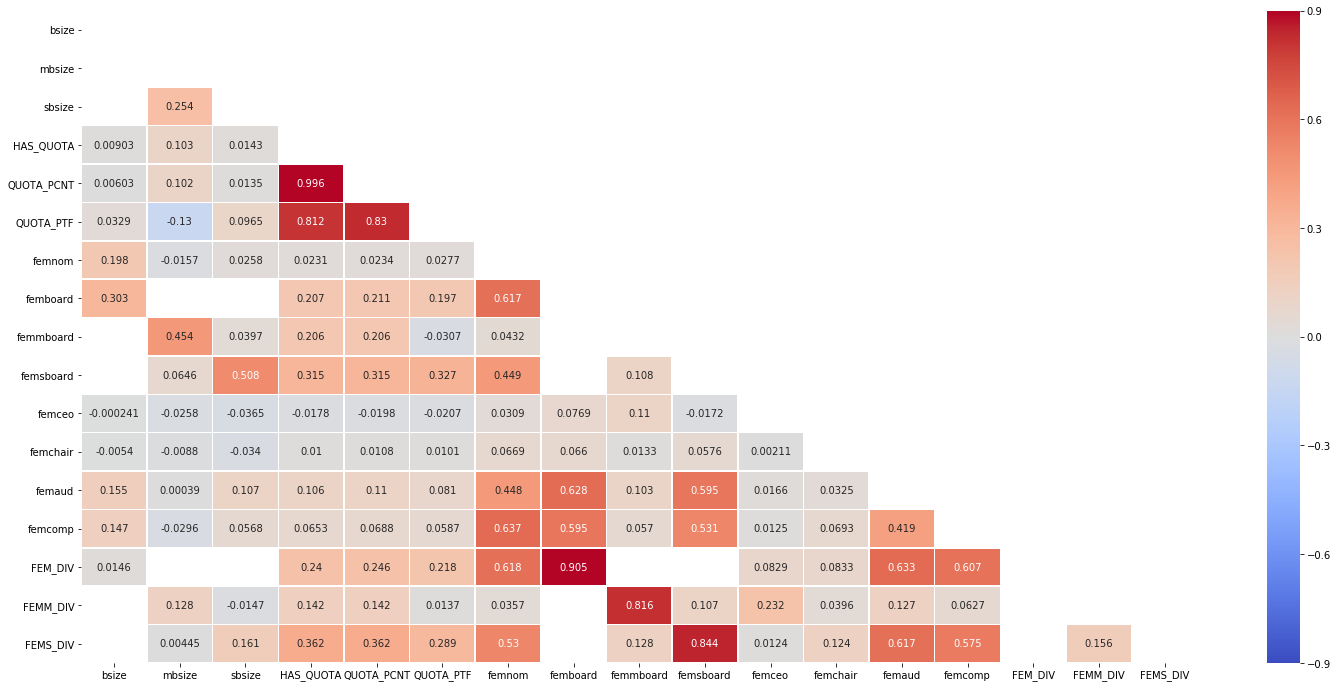

In [19]:

# Set a mask to avoid showing any NULL/NaN cells 
mask = df_corr.isnull()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25, 12))
sns.heatmap(
    df_corr, 
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns,
    vmin=-.9, 
    vmax=.9,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".3g",
    linewidths=.5
)

<a id='spreads'></a>
## Data Spread Information
[Return to Table of Contents](#top)

### Data spread for Female Director(s) on nomination committee (femnom).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002918B7C60B8>]],
      dtype=object)

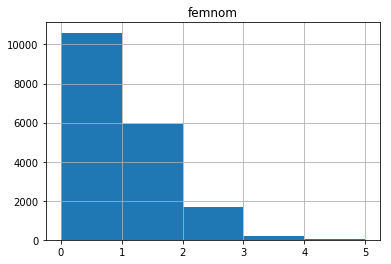

In [60]:
df_femnom = df_main[['femnom']].copy()
df_femnom.hist(bins=5)

In [21]:
df_femnom['femnom'].value_counts()

0.0    10602
1.0     5946
2.0     1674
3.0      219
4.0       32
5.0        3
Name: femnom, dtype: int64

### Data spread for Female Director(s) on board (femboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002918B954908>]],
      dtype=object)

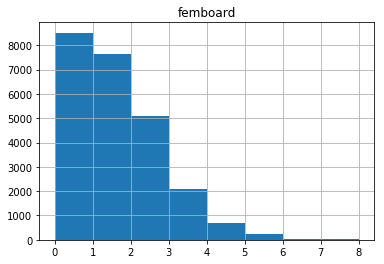

In [61]:
df_femboard = df_main[['femboard']].copy()
df_femboard.hist(bins=8, range=(0,8))

In [23]:
df_femboard['femboard'].value_counts()

0.0    8517
1.0    7655
2.0    5088
3.0    2097
4.0     701
5.0     250
6.0      44
7.0      19
8.0       2
9.0       1
Name: femboard, dtype: int64

### Data spread for Female Director on Management Board (femmboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029196C53A20>]],
      dtype=object)

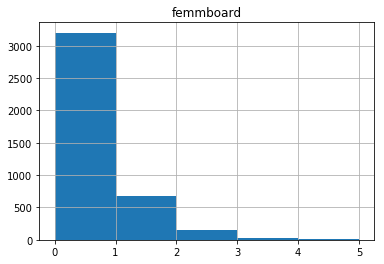

In [62]:
df_femmboard = df_main[['femmboard']].copy()
df_femmboard.hist(bins=5, range=(0,5))

In [25]:
df_femmboard['femmboard'].value_counts()

0.0    3201
1.0     672
2.0     157
3.0      24
4.0       9
Name: femmboard, dtype: int64

### Data spread for Female Director on Supervisory Board (femsboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000291970D6898>]],
      dtype=object)

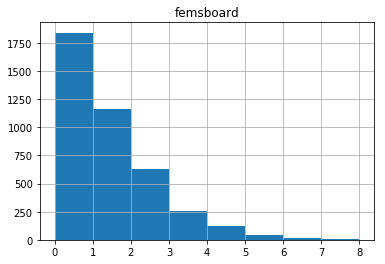

In [63]:
df_femsboard = df_main[['femsboard']].copy()
df_femsboard.hist(bins=8)

In [27]:
df_femsboard['femsboard'].value_counts()

0.0    1841
1.0    1162
2.0     625
3.0     253
4.0     119
5.0      43
6.0      12
7.0       6
8.0       2
Name: femsboard, dtype: int64

### Data spread for Woman CEO (femceo).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002918B8CAEF0>]],
      dtype=object)

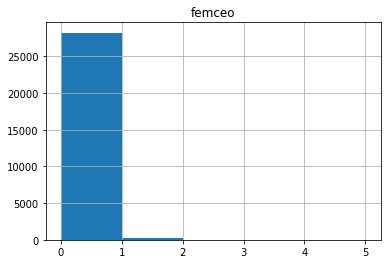

In [64]:
df_femceo = df_main[['femceo']].copy()
df_femceo.hist(bins=5, range=(0,5))

In [29]:
df_femceo['femceo'].value_counts()

0    28221
1      216
Name: femceo, dtype: int64

### Data spread for Woman Chairperson (femchair).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002918E270CC0>]],
      dtype=object)

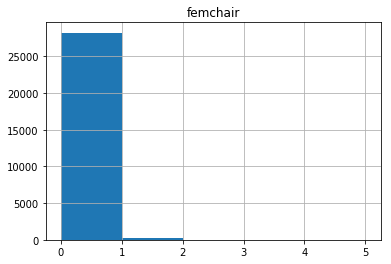

In [65]:
df_femchair = df_main[['femchair']].copy()
df_femchair.hist(bins=5, range=(0,5))

In [31]:
df_femchair['femchair'].value_counts()

0    28233
1      203
2        1
Name: femchair, dtype: int64

### Data spread for Female Director(s) on audit committee (femaud).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002918E265BA8>]],
      dtype=object)

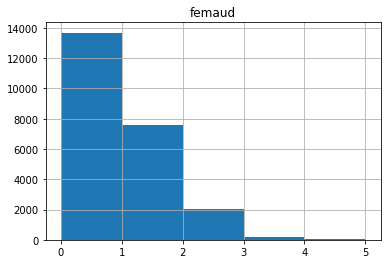

In [66]:
df_femaud = df_main[['femaud']].copy()
df_femaud.hist(bins=5)

In [33]:
df_femaud['femaud'].value_counts()

0.0    13687
1.0     7572
2.0     2042
3.0      205
4.0       38
5.0        6
Name: femaud, dtype: int64

### Data spread for Female Director(s) on remuneration committee (femcomp).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029187D1FE48>]],
      dtype=object)

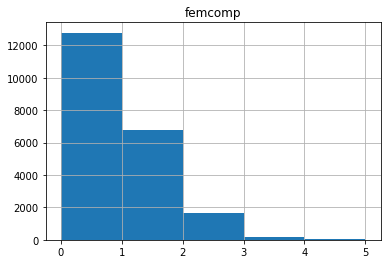

In [67]:
df_femcomp = df_main[['femcomp']].copy()
df_femcomp.hist(bins=5)

In [35]:
df_femcomp['femcomp'].value_counts()

0.0    12773
1.0     6758
2.0     1674
3.0      191
4.0       21
5.0        3
Name: femcomp, dtype: int64

<a id='averages'></a>
## Averages
[Return to Table of Contents](#top)

Text(0.5,1,'Averages')

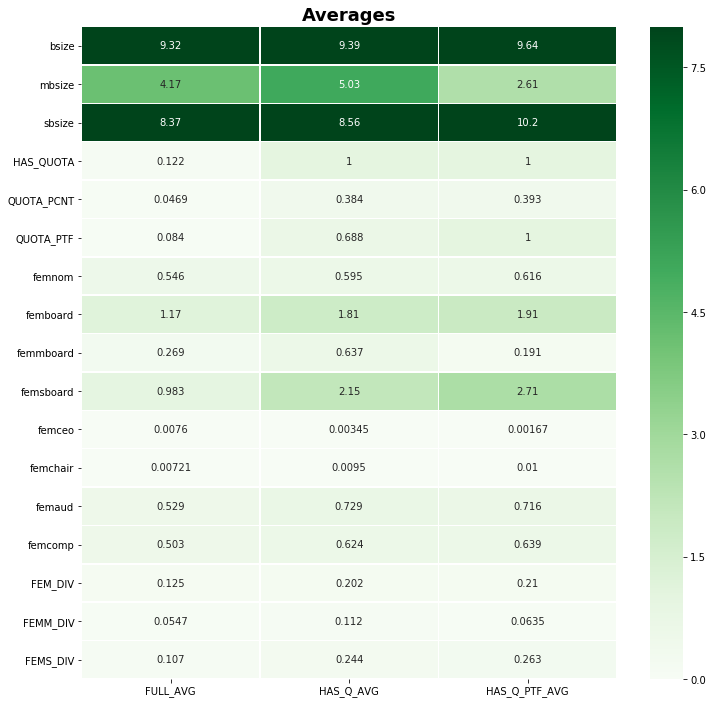

In [91]:
df_avg = pd.DataFrame(df_main[interested_hdrs].mean(), columns=["FULL_AVG"])

df_avg_q = pd.DataFrame(df_main.loc[df_main["HAS_QUOTA"] == 1][interested_hdrs].mean(), columns=['HAS_Q_AVG'])

df_avg_q_ptf = pd.DataFrame(df_main.loc[df_main["QUOTA_PTF"] == 1][interested_hdrs].mean(), columns=['HAS_Q_PTF_AVG'])

df_avgs = pd.merge(pd.merge(df_avg, df_avg_q, how='inner', left_index=True, right_index=True, copy=True), 
         df_avg_q_ptf, left_index=True, right_index=True, copy=True) 



plt.figure(figsize = (12, 12))
sns.heatmap(
    df_avgs, 
    xticklabels=df_avgs.columns,
    yticklabels=df_avgs.index,
    vmin=0, 
    vmax=8,
    cmap="Greens",
    annot=True,
    fmt=".3g",
    linewidths=.5
)
plt.title("Averages", fontdict={'fontsize': 18, 'fontweight' : 'bold'})

<a id='results'></a>
## Results Section
[Return to Table of Contents](#top)

<a id='board_size'></a>
## Women and Board Sizes
[Return to Table of Contents](#top)

## Notable: There is a significant relationship between having women on the board and the board size for one-tier boards.

### In the regression below, we see an R-squared of 0.546 with a P-value of ~0.00 indicating that the size of the board is increased when a woman is added to the board. This shows a trend of adding a woman to the board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member.

####  `Correlation: ~.303; R-Squared: 0.546; P-value: ~0.00; Observations: 24,371`

Trendline Equation: y=0.772918x+(8.416441)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bsize   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:55:25   Log-Likelihood:                -80563.
No. Observations:               24371   AIC:                         1.611e+05
Df Residuals:                   24370   BIC:                         1.611e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femboard       4.3616      0.025    171.196      0.000       4.312       4.412
==============================================================================
Omnibus:                      656.750   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.043
Skew:                          -0.221   Prob(JB):                    4.69e-258
Kurtosis:                       3.986   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

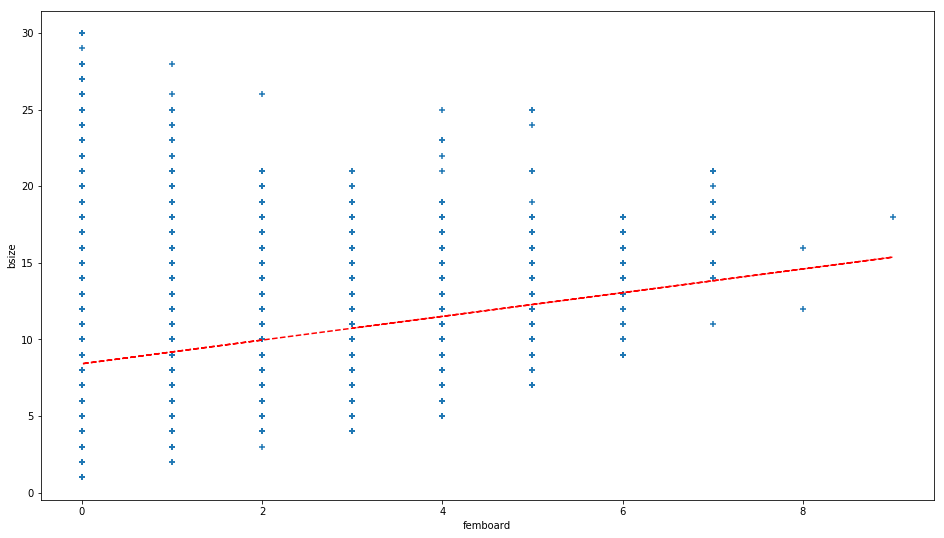

In [36]:
df_board_w_fem = df_main[['bsize', 'femboard', 'FEM_DIV']].copy()

df_board_w_fem = df_board_w_fem.dropna()

x = df_board_w_fem['femboard']
y = df_board_w_fem['bsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_fem['femboard'], df_board_w_fem['bsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("bsize")
plt.xlabel("femboard")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There is a significant (but smaller than femboard->bsize) relationship between having women on the management board and the management board size for two-tier boards.

### In the regression below, we see an R-squared of 0.334 with a P-value of ~0.00 indicating that the size of the management board is increased when a woman is added to the board. This shows a trend of adding a woman to the board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member. However, this is not as strong of a model as this type of relationship for one-tier boards.

####  `Correlation: ~.454; R-Squared: 0.334; P-value: ~0.00; Observations: 3,964`

Trendline Equation: y=2.062991x+(3.707893)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mbsize   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1986.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:55:25   Log-Likelihood:                -11236.
No. Observations:                3964   AIC:                         2.247e+04
Df Residuals:                    3963   BIC:                         2.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femmboard      4.5066      0.101     44.568      0.000       4.308       4.705
==============================================================================
Omnibus:                      336.083   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1804.388
Skew:                           0.204   Prob(JB):                         0.00
Kurtosis:                       6.280   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

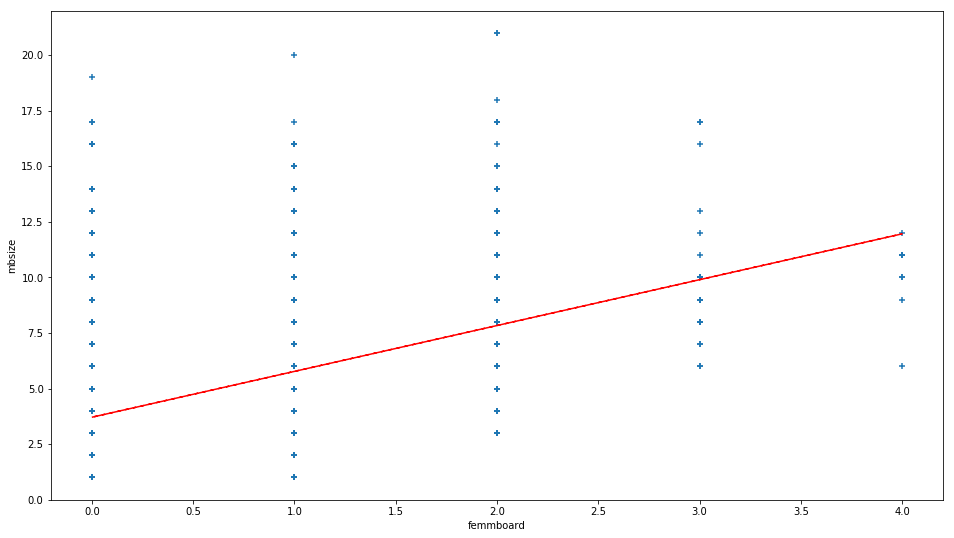

In [37]:
df_board_w_femm = df_main[['mbsize', 'femmboard', 'FEMM_DIV']].copy()

df_board_w_femm = df_board_w_femm.dropna()

x = df_board_w_femm['femmboard']
y = df_board_w_femm['mbsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_femm['femmboard'], df_board_w_femm['mbsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("mbsize")
plt.xlabel("femmboard")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There is a significant relationship between having women on the supervisory board and the supervisory board size for two-tier boards.

### In the regression below, we see an R-squared of 0.553 with a P-value of ~0.00 indicating that the size of the supervisory board is increased when a woman is added to the board. This is a strong model showing a trend of adding a woman to the supervisory board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member.

####  `Correlation: ~.508; R-Squared: 0.553; P-value: ~0.00; Observations: 4,061`

Trendline Equation: y=1.837440x+(6.571027)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sbsize   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5015.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:55:25   Log-Likelihood:                -13244.
No. Observations:                4061   AIC:                         2.649e+04
Df Residuals:                    4060   BIC:                         2.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femsboard      4.5218      0.064     70.815      0.000       4.397       4.647
==============================================================================
Omnibus:                      123.106   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.077
Skew:                          -0.157   Prob(JB):                     1.85e-60
Kurtosis:                       4.236   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

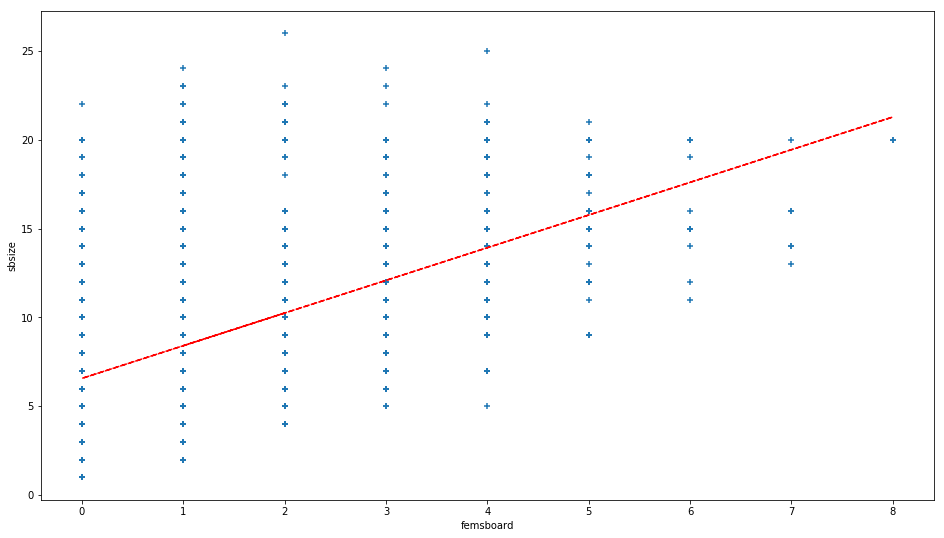

In [38]:
df_board_w_fems = df_main[['sbsize', 'femsboard', 'FEMS_DIV']].copy()

df_board_w_fems = df_board_w_fems.dropna()

x = df_board_w_fems['femsboard']
y = df_board_w_fems['sbsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_fems['femsboard'], df_board_w_fems['sbsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("sbsize")
plt.xlabel("femsboard")

model = sm.OLS(y, x).fit()

model.summary()

### Board diversity (FEM_DIV) against board size

Trendline Equation: y=0.357120x+(9.278674)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bsize   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 2.158e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:55:26   Log-Likelihood:                -82457.
No. Observations:               24371   AIC:                         1.649e+05
Df Residuals:                   24370   BIC:                         1.649e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEM_DIV       38.3760      0.261    146.901      0.000      37.864      38.888
==============================================================================
Omnibus:                     2072.213   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3939.790
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       4.579   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

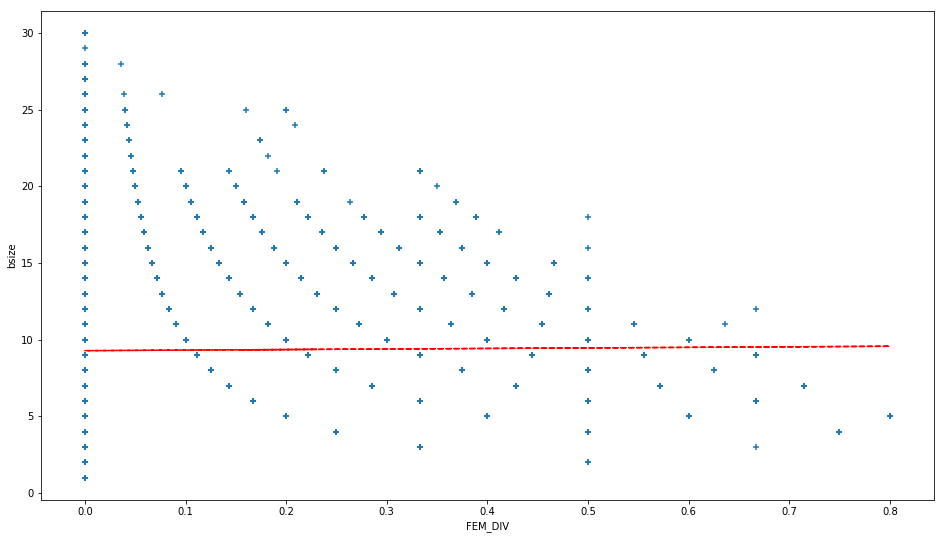

In [39]:
df_board_w_fem = df_main[['bsize', 'femboard', 'FEM_DIV']].copy()

df_board_w_fem = df_board_w_fem.dropna()

x = df_board_w_fem['FEM_DIV']
y = df_board_w_fem['bsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_fem['FEM_DIV'], df_board_w_fem['bsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("bsize")
plt.xlabel("FEM_DIV")

model = sm.OLS(y, x).fit()

model.summary()

<a id='gender_parity'></a>
## Gender Parity and Diversity Quotas
[Return to Table of Contents](#top)

## Notable: Having a quota is not the key driver for gender parity on one-tier boards.

### Countries were coded if they had a quota (1) or not (0) and when the quota came into place. While the diversity ratio (FEM_DIV) calculated by dividing femboard by bsize.

#### `Correlation: ~0.240; Pseudo R-squared: -29.10; P-value: ~0.00; Observations: 24,371`

Optimization terminated successfully.
         Current function value: 0.653820
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                FEM_DIV   No. Observations:                24371
Model:                          Logit   Df Residuals:                    24370
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -29.10
Time:                        12:55:49   Log-Likelihood:                -15934.
converged:                       True   LL-Null:                       -529.37
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA     -1.3730      0.045    -30.635      0.000      -1.461      -1.285
==============================================================================
"""

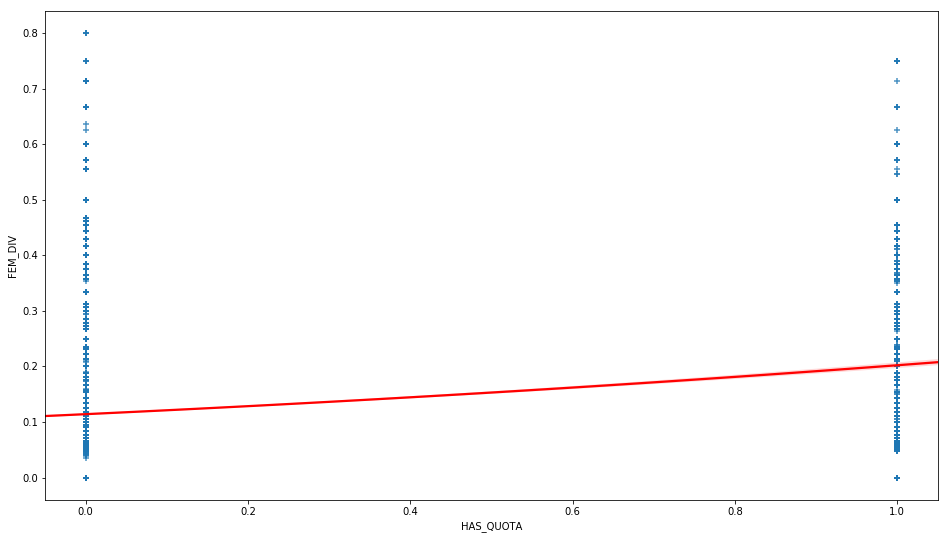

In [40]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'femboard', 'FEM_DIV']].copy()

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['HAS_QUOTA']
y = df_quota_w_fem['FEM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='HAS_QUOTA', y='FEM_DIV', data=df_quota_w_fem, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()
model.summary()

## Notable: Having a quota is not the key driver for gender parity on the management board for two-tier boards.

#### `Correlation: ~0.142; Pseudo R-squared: -17.87; P-value: ~0.00; Observations: 3,964`

Optimization terminated successfully.
         Current function value: 0.652696
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               FEMM_DIV   No. Observations:                 3964
Model:                          Logit   Df Residuals:                     3963
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -17.87
Time:                        12:55:57   Log-Likelihood:                -2587.3
converged:                       True   LL-Null:                       -137.08
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA     -2.0660      0.175    -11.803      0.000      -2.409      -1.723
==============================================================================
"""

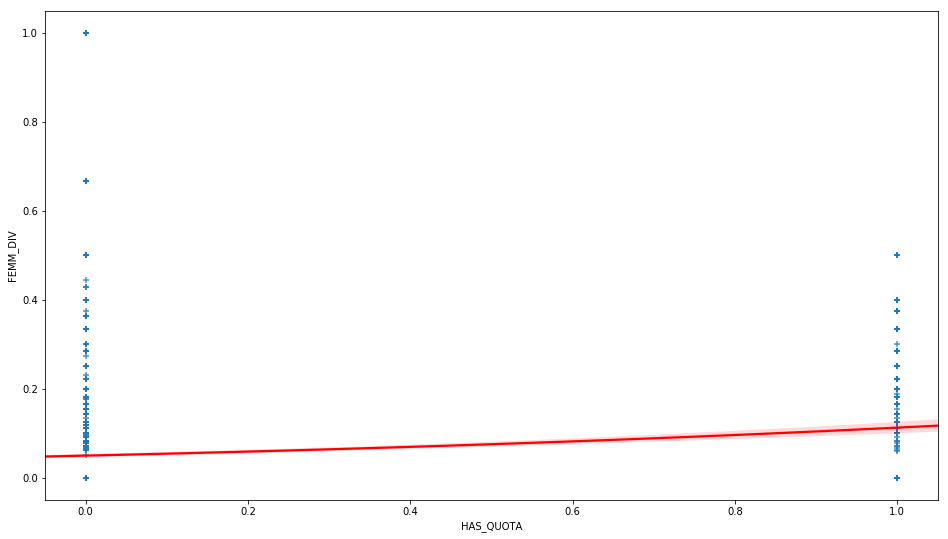

In [41]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'femmboard', 'FEMM_DIV']].copy()

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['HAS_QUOTA']
y = df_quota_w_femm['FEMM_DIV']


plt.figure(figsize = (16, 9))
sns.regplot(x='HAS_QUOTA', y='FEMM_DIV', data=df_quota_w_femm, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()

model.summary()

## Notable: Having a quota is not the key driver for gender parity on the supervisory board for two-tier boards.

#### `Correlation: 0.362; Pseudo R-squared: -46.08; P-value ~0.00; Observations: 4,061`

Optimization terminated successfully.
         Current function value: 0.670367
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               FEMS_DIV   No. Observations:                 4061
Model:                          Logit   Df Residuals:                     4060
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -46.08
Time:                        12:56:03   Log-Likelihood:                -2722.4
converged:                       True   LL-Null:                       -57.825
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA     -1.1320      0.118     -9.574      0.000      -1.364      -0.900
==============================================================================
"""

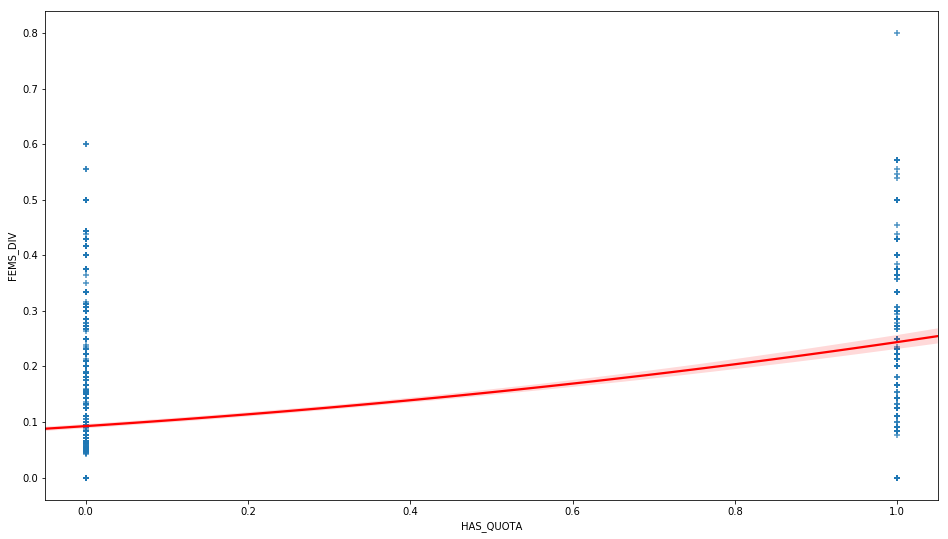

In [42]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'femsboard', 'FEMS_DIV']].copy()

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['HAS_QUOTA']
y = df_quota_w_fems['FEMS_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='HAS_QUOTA', y='FEMS_DIV', data=df_quota_w_fems, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()

model.summary()

## Notable: Having a quota for PTFs is not the key driver for gender parity on one-tier boards.

### Countries were coded if they had a quota for PTFs (1) or not (0) and when the quota came into place. While the diversity ratio (FEM_DIV) calculated by dividing femboard by bsize.

#### `Correlation: ~0.218; Pseudo R-squared: -29.69; P-value: ~0.00; Observations: 24,371`

Optimization terminated successfully.
         Current function value: 0.666721
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                FEM_DIV   No. Observations:                24371
Model:                          Logit   Df Residuals:                    24370
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -29.69
Time:                        12:56:27   Log-Likelihood:                -16249.
converged:                       True   LL-Null:                       -529.37
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF     -1.3250      0.052    -25.261      0.000      -1.428      -1.222
==============================================================================
"""

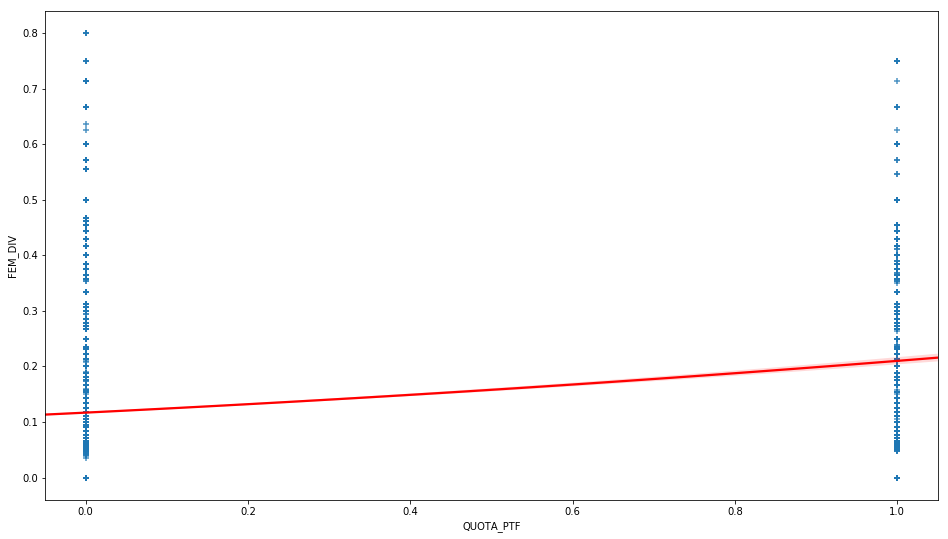

In [43]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard', 'FEM_DIV']].copy()

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PTF']
y = df_quota_w_fem['FEM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PTF', y='FEM_DIV', data=df_quota_w_fem, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()

model.summary()

## Notable: Having a quota for PTFs is not the key driver for gender parity on the management board for two-tier boards.

#### `Correlation: ~0.0137; Pseudo R-squared: -18.46; P-value: ~0.00; Observations: 3,964`

Optimization terminated successfully.
         Current function value: 0.672788
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               FEMM_DIV   No. Observations:                 3964
Model:                          Logit   Df Residuals:                     3963
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -18.46
Time:                        12:56:34   Log-Likelihood:                -2666.9
converged:                       True   LL-Null:                       -137.08
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF     -2.6916      0.348     -7.737      0.000      -3.373      -2.010
==============================================================================
"""

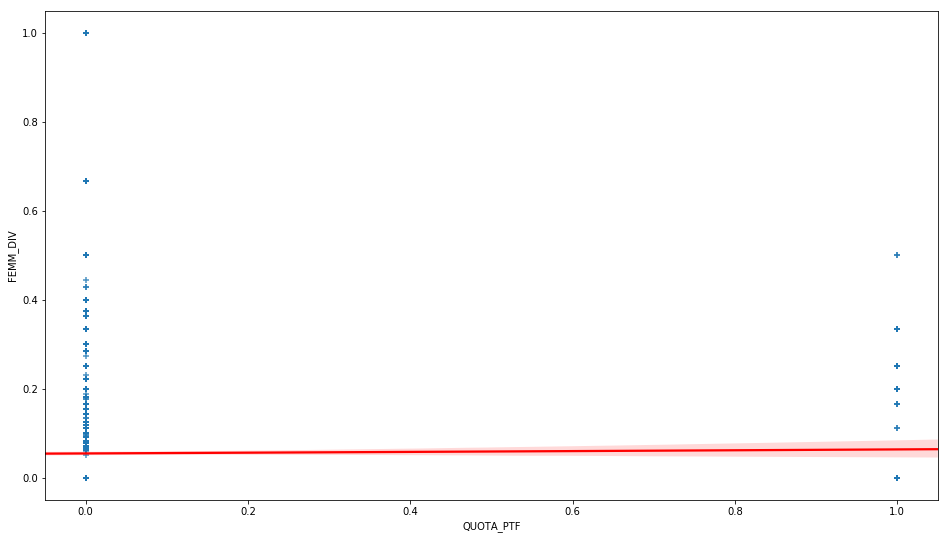

In [44]:
df_quota_w_femm = df_main[['QUOTA_PTF', 'femmboard', 'FEMM_DIV']].copy()

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PTF']
y = df_quota_w_femm['FEMM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PTF', y='FEMM_DIV', data=df_quota_w_femm, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()

model.summary()

## Notable: Having a quota for PTFs is not the key driver for gender parity on the supervisory board for two-tier boards.

#### `Correlation: 0.289; Pseudo R-squared: -46.96; P-value ~0.0; Observations: 4,061`

Optimization terminated successfully.
         Current function value: 0.682905
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               FEMS_DIV   No. Observations:                 4061
Model:                          Logit   Df Residuals:                     4060
Method:                           MLE   Df Model:                            0
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  -46.96
Time:                        12:56:42   Log-Likelihood:                -2773.3
converged:                       True   LL-Null:                       -57.825
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF     -1.0298      0.161     -6.397      0.000      -1.345      -0.714
==============================================================================
"""

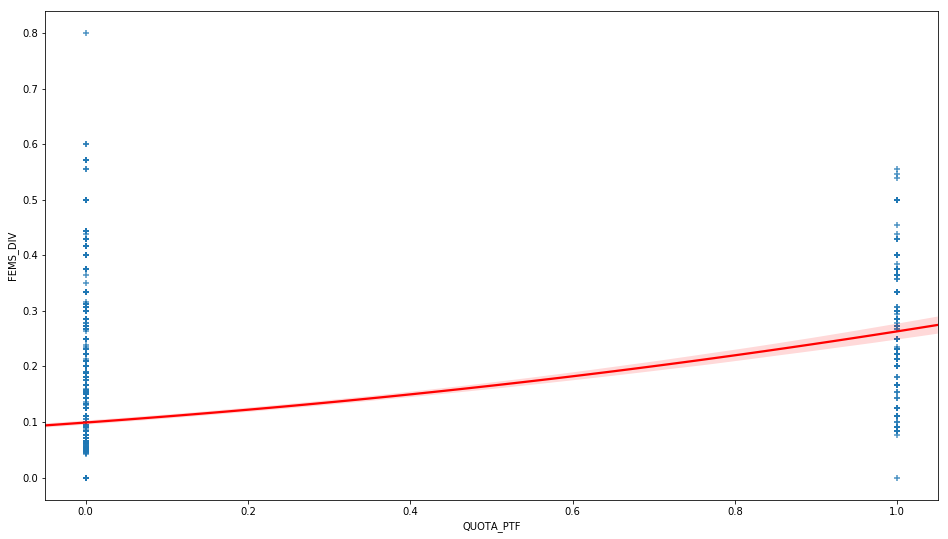

In [45]:
df_quota_w_fems = df_main[['QUOTA_PTF', 'femsboard', 'FEMS_DIV']].copy()

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['QUOTA_PTF']
y = df_quota_w_fems['FEMS_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PTF', y='FEMS_DIV', data=df_quota_w_fems, logistic=True, marker="+", line_kws={"color": "red"})

model = sm.Logit(y, x).fit()
model.summary()

<a id='quota_pcnt'></a>
## Quota Countries and Quota Percentage
[Return to Table of Contents](#top)

## Notable: There is a significant relationship between those countries that do have quotas and the percentage of women on the board that the quota requires.

### In countries which have a quota, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota, companies only do what they can to fulfil it.

#### `R-Squared: 0.630; P-value ~0.0; Observations: 3,087`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FEM_DIV   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     6192.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:56:43   Log-Likelihood:                 1608.5
No. Observations:                3087   AIC:                            -3215.
Df Residuals:                    3086   BIC:                            -3209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     0.5302      0.007     78.687      0.000       0.517       0.543
==============================================================================
Omnibus:                      103.296   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.106
Skew:                           0.265   Prob(JB):                     2.20e-16
Kurtosis:                       2.471   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

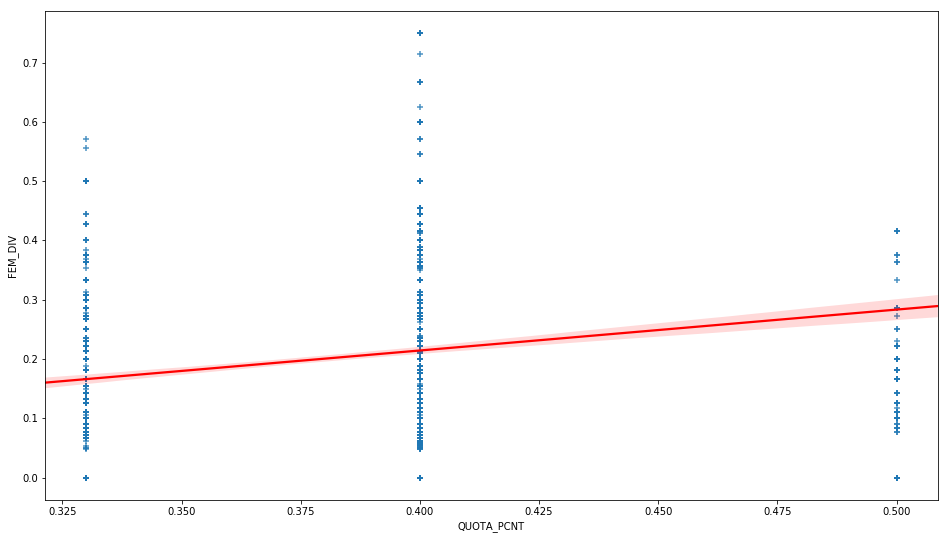

In [46]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femboard', 'FEM_DIV']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['HAS_QUOTA'] == 1]

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['FEM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PCNT', y='FEM_DIV', data=df_quota_w_fem, logistic=False, marker="+", line_kws={"color": "red"})

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There is a significant relationship between those countries that do have quotas for PTFs and the percentage of women on the board of a PTF that the quota requires.

### In countries which have a quota for PTFs, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota for a PTF, companies only do what they can to fulfil it.

#### `R-Squared: 0.654; P-value ~0.00; Observations: 2,191`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FEM_DIV   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     4146.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:56:43   Log-Likelihood:                 999.61
No. Observations:                2191   AIC:                            -1997.
Df Residuals:                    2190   BIC:                            -1992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     0.5357      0.008     64.392      0.000       0.519       0.552
==============================================================================
Omnibus:                      134.911   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.910
Skew:                           0.261   Prob(JB):                     1.09e-15
Kurtosis:                       2.305   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

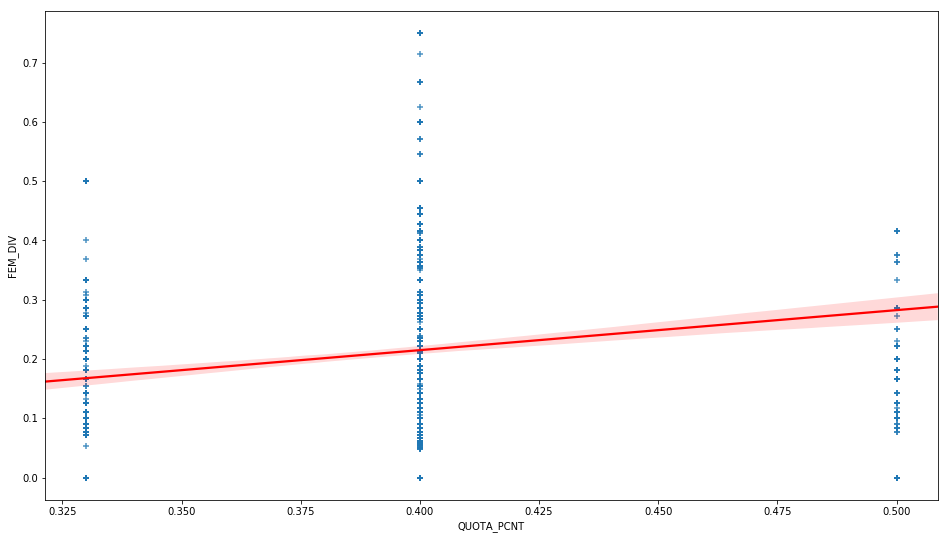

In [47]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'QUOTA_PCNT', 'femboard', 'FEM_DIV']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['QUOTA_PTF'] == 1]

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['FEM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PCNT', y='FEM_DIV', data=df_quota_w_fem, logistic=False, marker="+", line_kws={"color": "red"})

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There is a significant relationship between those countries that do have quotas and the percentage of women on the management board that the quota requires for two-tier boards. 
#### `R-Squared: 0.461; P-value ~0.0; Observations: 327`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FEMM_DIV   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     279.1
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           1.08e-45
Time:                        12:56:44   Log-Likelihood:                 225.10
No. Observations:                 327   AIC:                            -448.2
Df Residuals:                     326   BIC:                            -444.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     0.2816      0.017     16.705      0.000       0.248       0.315
==============================================================================
Omnibus:                       26.920   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.508
Skew:                           0.747   Prob(JB):                     1.44e-07
Kurtosis:                       2.714   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

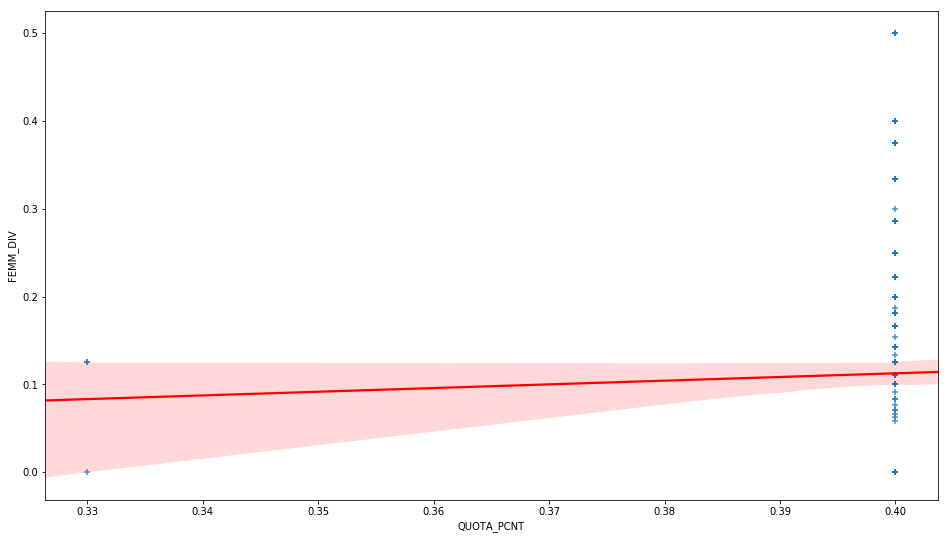

In [48]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femmboard', 'FEMM_DIV']].copy()
df_quota_w_femm = df_quota_w_femm[df_quota_w_femm['HAS_QUOTA'] == 1]

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PCNT']
y = df_quota_w_femm['FEMM_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PCNT', y='FEMM_DIV', data=df_quota_w_femm, logistic=False, marker="+", line_kws={"color": "red"})

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There is a highly significant relationship between those countries that do have quotas and the percentage of women on the supervisory board that the quota requires for two-tier boards.

#### `R-Squared: 0.777; P-value ~0.0; Observations: 388`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FEMS_DIV   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1348.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          3.77e-128
Time:                        12:56:44   Log-Likelihood:                 238.92
No. Observations:                 388   AIC:                            -475.8
Df Residuals:                     387   BIC:                            -471.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     0.6109      0.017     36.716      0.000       0.578       0.644
==============================================================================
Omnibus:                        6.658   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.492
Skew:                           0.283   Prob(JB):                       0.0389
Kurtosis:                       3.287   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

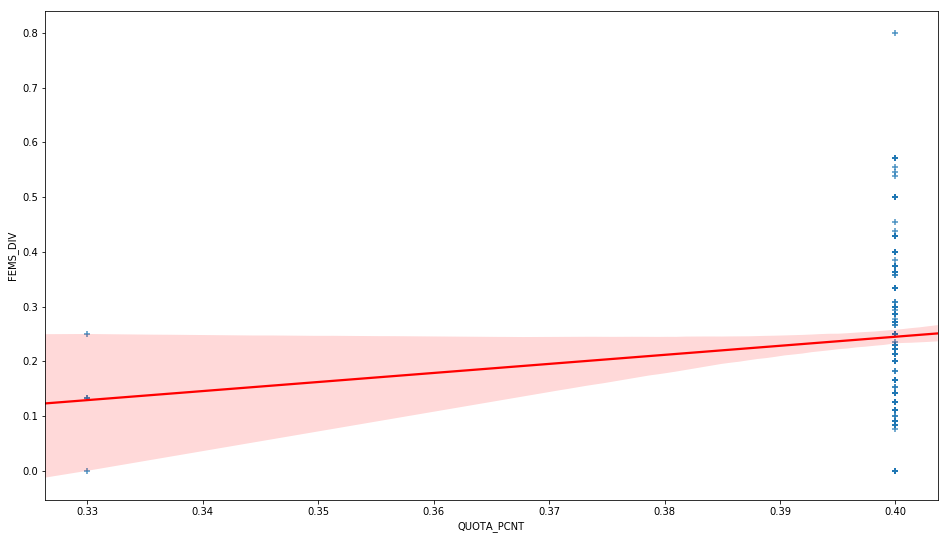

In [49]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femsboard', 'FEMS_DIV']].copy()
df_quota_w_fems = df_quota_w_fems[df_quota_w_fems['HAS_QUOTA'] == 1]

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['QUOTA_PCNT']
y = df_quota_w_fems['FEMS_DIV']

plt.figure(figsize = (16, 9))
sns.regplot(x='QUOTA_PCNT', y='FEMS_DIV', data=df_quota_w_fems, logistic=False, marker="+", line_kws={"color": "red"})

model = sm.OLS(y, x).fit()

model.summary()

<a id='countries'></a>
# Diversity Information By Country
#### Assessments for: NOR; ESP; FIN; CAN; ISR; FRA; ITA; BEL
[Return to Table of Contents](#top)


<a id='quota_countries'></a>
### Quota countries with datapoint counts
[Return to Table of Contents](#top)

|ISO-3|Datapoint Count|
|------|------|
|NOR|629|
|ESP|605|
|FIN|529|
|CAN|1180|
|ISR|63|
|FRA|1340|
|ITA|1014|
|BEL|446|


<a id='countries_tbl'></a>
### All countries by year with percentage of female board diversity (FEM_DIV: femboard / bsize)
[Return to Table of Contents](#top)

In [50]:
df_fem_desc = df_main[['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT', 'FEM_DIV']]
df_fem_desc_grouped = df_fem_desc.groupby(['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT'])['FEM_DIV'].mean().reset_index()
#df_fem_desc_grouped.to_excel('year_over_year.xlsx', index=False)
df_fem_desc_grouped

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
0,AUS,2007,0,0,0.00,0.074877
1,AUS,2008,0,0,0.00,0.080014
2,AUS,2009,0,0,0.00,0.079301
3,AUS,2010,0,0,0.00,0.097514
4,AUS,2011,0,0,0.00,0.100655
5,AUS,2012,0,0,0.00,0.117550
6,AUS,2013,0,0,0.00,0.123762
7,AUS,2014,0,0,0.00,0.143475
8,AUS,2015,0,0,0.00,0.156732
9,AUT,2007,0,0,0.00,NaN


<a id='quota_country_div'></a>
### Table of diversity for countries with quotas
[Return to Table of Contents](#top)

In [51]:
quota_countries = ["NOR", "ESP", "FIN", "CAN", "ISR", "FRA", "ITA", "BEL"]

df_fem_desc_grouped_quotas = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'].isin(quota_countries)]

df_fem_desc_grouped_quotas

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
18,BEL,2007,0,0,0.00,0.091718
19,BEL,2008,0,0,0.00,0.078240
20,BEL,2009,0,0,0.00,0.096633
21,BEL,2010,0,0,0.00,0.109973
22,BEL,2011,1,1,0.33,0.094582
23,BEL,2012,1,1,0.33,0.121396
24,BEL,2013,1,1,0.33,0.148643
25,BEL,2014,1,1,0.33,0.151502
26,BEL,2015,1,1,0.33,0.175830
36,CAN,2007,0,0,0.00,0.130336


<a id='quota_graphs'></a>
## Graphs for firms with quotas for publicly traded firms
### Red line indicates year the quota legislation was passed

<a id='norway'></a>
### Norway
#### Legislation passed in 2003
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
232,NOR,2007,1,1,0.4,0.349664
233,NOR,2008,1,1,0.4,0.356773
234,NOR,2009,1,1,0.4,0.350089
235,NOR,2010,1,1,0.4,0.325626
236,NOR,2011,1,1,0.4,0.337901
237,NOR,2012,1,1,0.4,0.328221
238,NOR,2013,1,1,0.4,0.329047
239,NOR,2014,1,1,0.4,0.326805
240,NOR,2015,1,1,0.4,0.334695


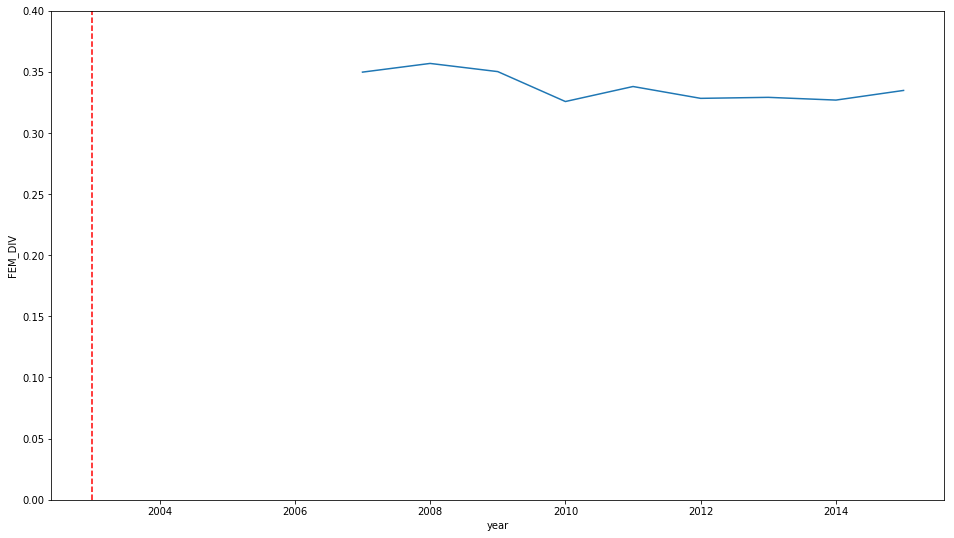

In [52]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "NOR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2003

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='spain'></a>
### Spain
#### Legislation passed in 2007
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
90,ESP,2007,1,1,0.4,0.053356
91,ESP,2008,1,1,0.4,0.068449
92,ESP,2009,1,1,0.4,0.085717
93,ESP,2010,1,1,0.4,0.093963
94,ESP,2011,1,1,0.4,0.102554
95,ESP,2012,1,1,0.4,0.092674
96,ESP,2013,1,1,0.4,0.098817
97,ESP,2014,1,1,0.4,0.115460
98,ESP,2015,1,1,0.4,0.137167


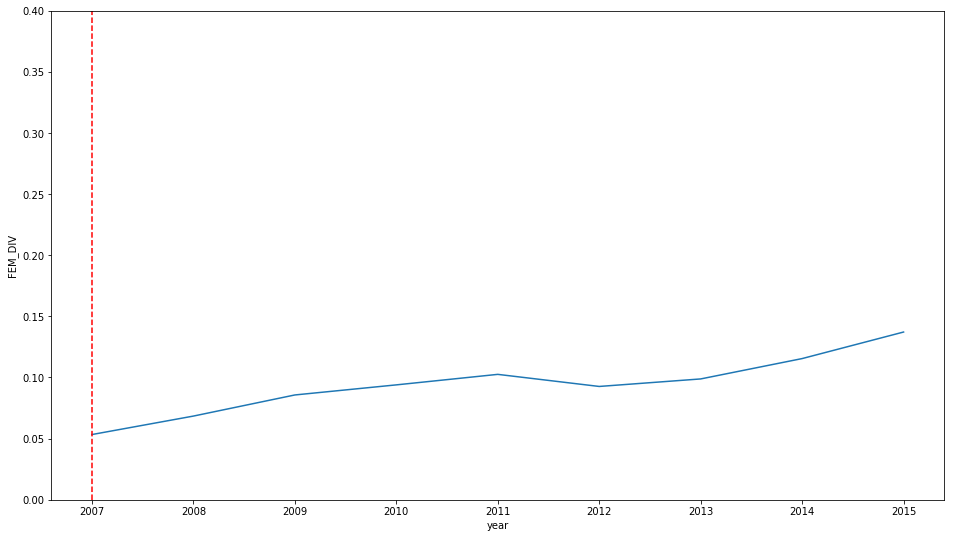

In [53]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ESP"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2007

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='france'></a>
### France
#### Legislation passed in 2011
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
108,FRA,2007,0,0,0.0,0.089856
109,FRA,2008,0,0,0.0,0.093146
110,FRA,2009,0,0,0.0,0.104937
111,FRA,2010,0,0,0.0,0.125872
112,FRA,2011,1,1,0.4,0.173873
113,FRA,2012,1,1,0.4,0.211028
114,FRA,2013,1,1,0.4,0.240414
115,FRA,2014,1,1,0.4,0.283745
116,FRA,2015,1,1,0.4,0.302779


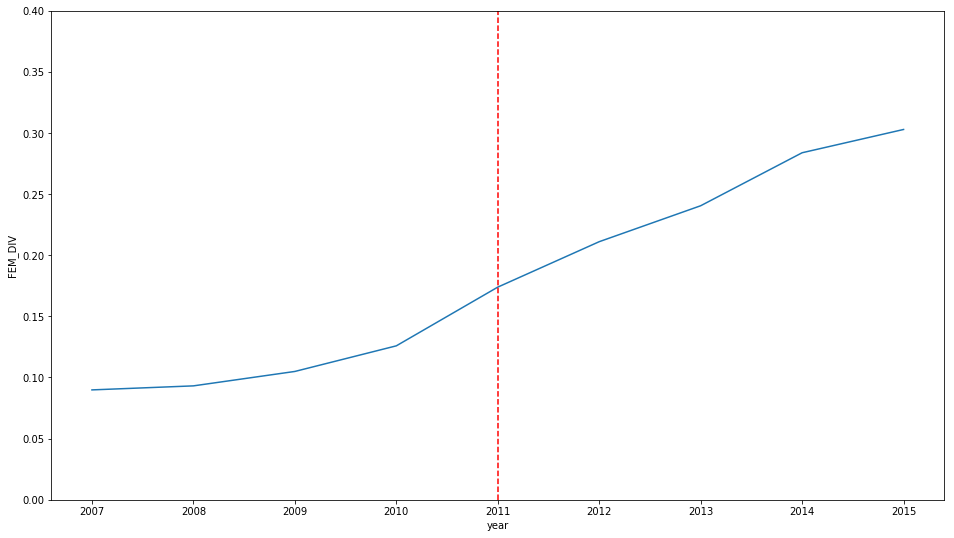

In [54]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "FRA"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='israel'></a>
### Israel
#### Legislation passed in 1999
#### Note: No compliance date or quota percentage was given. It was specified that one board seat went to a woman.
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
183,ISR,2011,1,1,0.5,0.128837
184,ISR,2012,1,1,0.5,0.146349
185,ISR,2013,1,1,0.5,0.169790
186,ISR,2014,1,1,0.5,0.187448
187,ISR,2015,1,1,0.5,0.233399


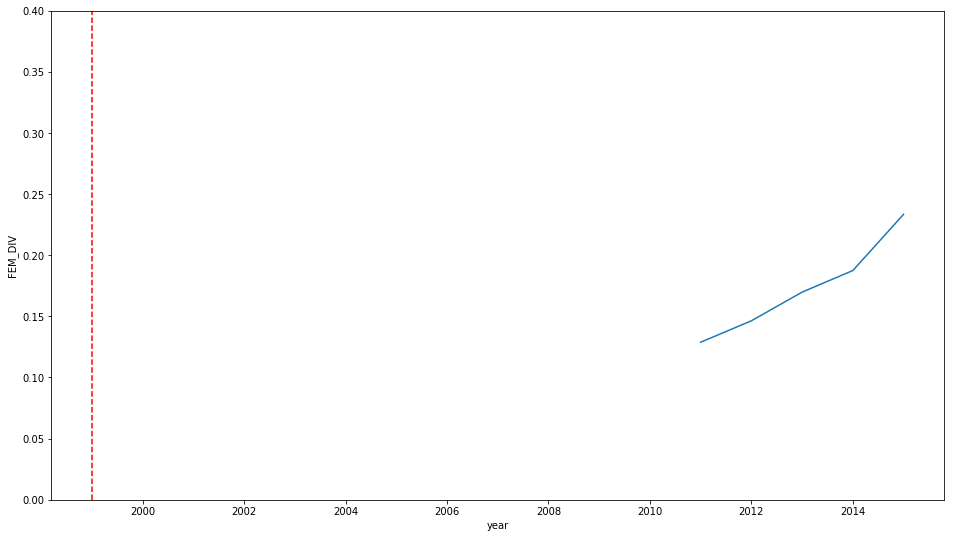

In [55]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ISR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 1999

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry


<a id='belgium'></a>
### Belgium
#### Legislation passed in 2011
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
18,BEL,2007,0,0,0.00,0.091718
19,BEL,2008,0,0,0.00,0.078240
20,BEL,2009,0,0,0.00,0.096633
21,BEL,2010,0,0,0.00,0.109973
22,BEL,2011,1,1,0.33,0.094582
23,BEL,2012,1,1,0.33,0.121396
24,BEL,2013,1,1,0.33,0.148643
25,BEL,2014,1,1,0.33,0.151502
26,BEL,2015,1,1,0.33,0.175830


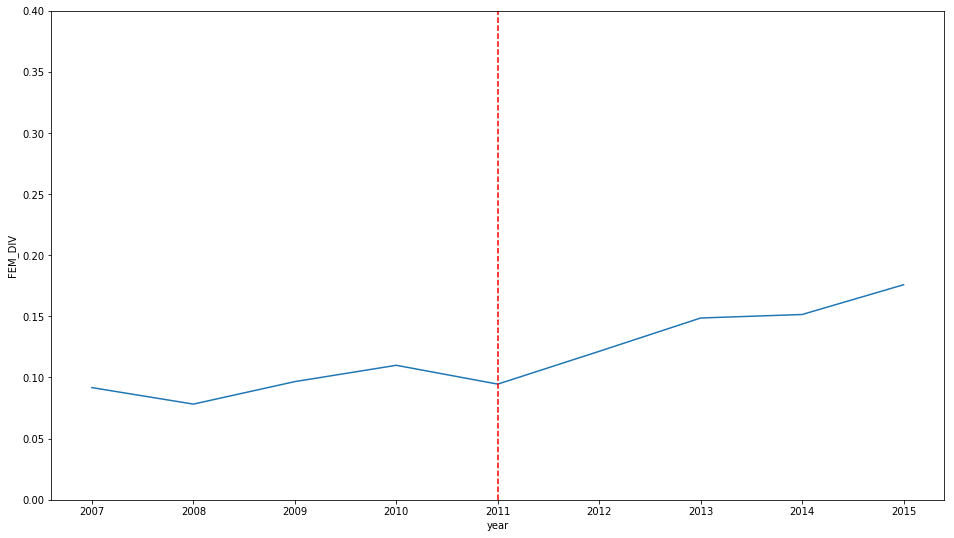

In [56]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "BEL"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

[Return to Table of Contents](#top)